In [28]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
# import ordered dict
from collections import OrderedDict

In [29]:
input = "/work/mmalucch/out_hh4b/cutflow/out_MC_cutflow_DHH/output_GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

o = load(f"{input}")

In [50]:
print(o["cutflow"])
for k in o["cutflow"].keys():
    print(k)
    for kk in o["cutflow"][k].keys():
        print(f"\t{kk} {o['cutflow'][k][kk]}")
dataset=list(o["cutflow"]["initial"].keys())[0]
print(f"Dataset: {dataset}")
sample="GluGlutoHHto4B"

num_events_dict=OrderedDict()
for k in o["cutflow"].keys():
    for kk in o["cutflow"][k].keys():
        if type(o["cutflow"][k][kk])==int:# and k != "initial":
            continue
        print(k)
        new_value= o["cutflow"][k][kk][sample]
        print(f"\t{new_value}")
        num_events_dict[k]=new_value

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': 7391383}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': 7391383}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': 4435504}, 'four_jets_presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 4435504}}, 'MET_filter': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 4433363}}, 'Lepton_veto': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 4351942}}, 'Jet_Veto_map': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 3894567}}, 'HLT_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 2368299}}, 'jet_pT_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 1996547}}, '2b_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 1933825}}, 'third_btag_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p

In [51]:
def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        # transform to percentage
        percentage = height * 100
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

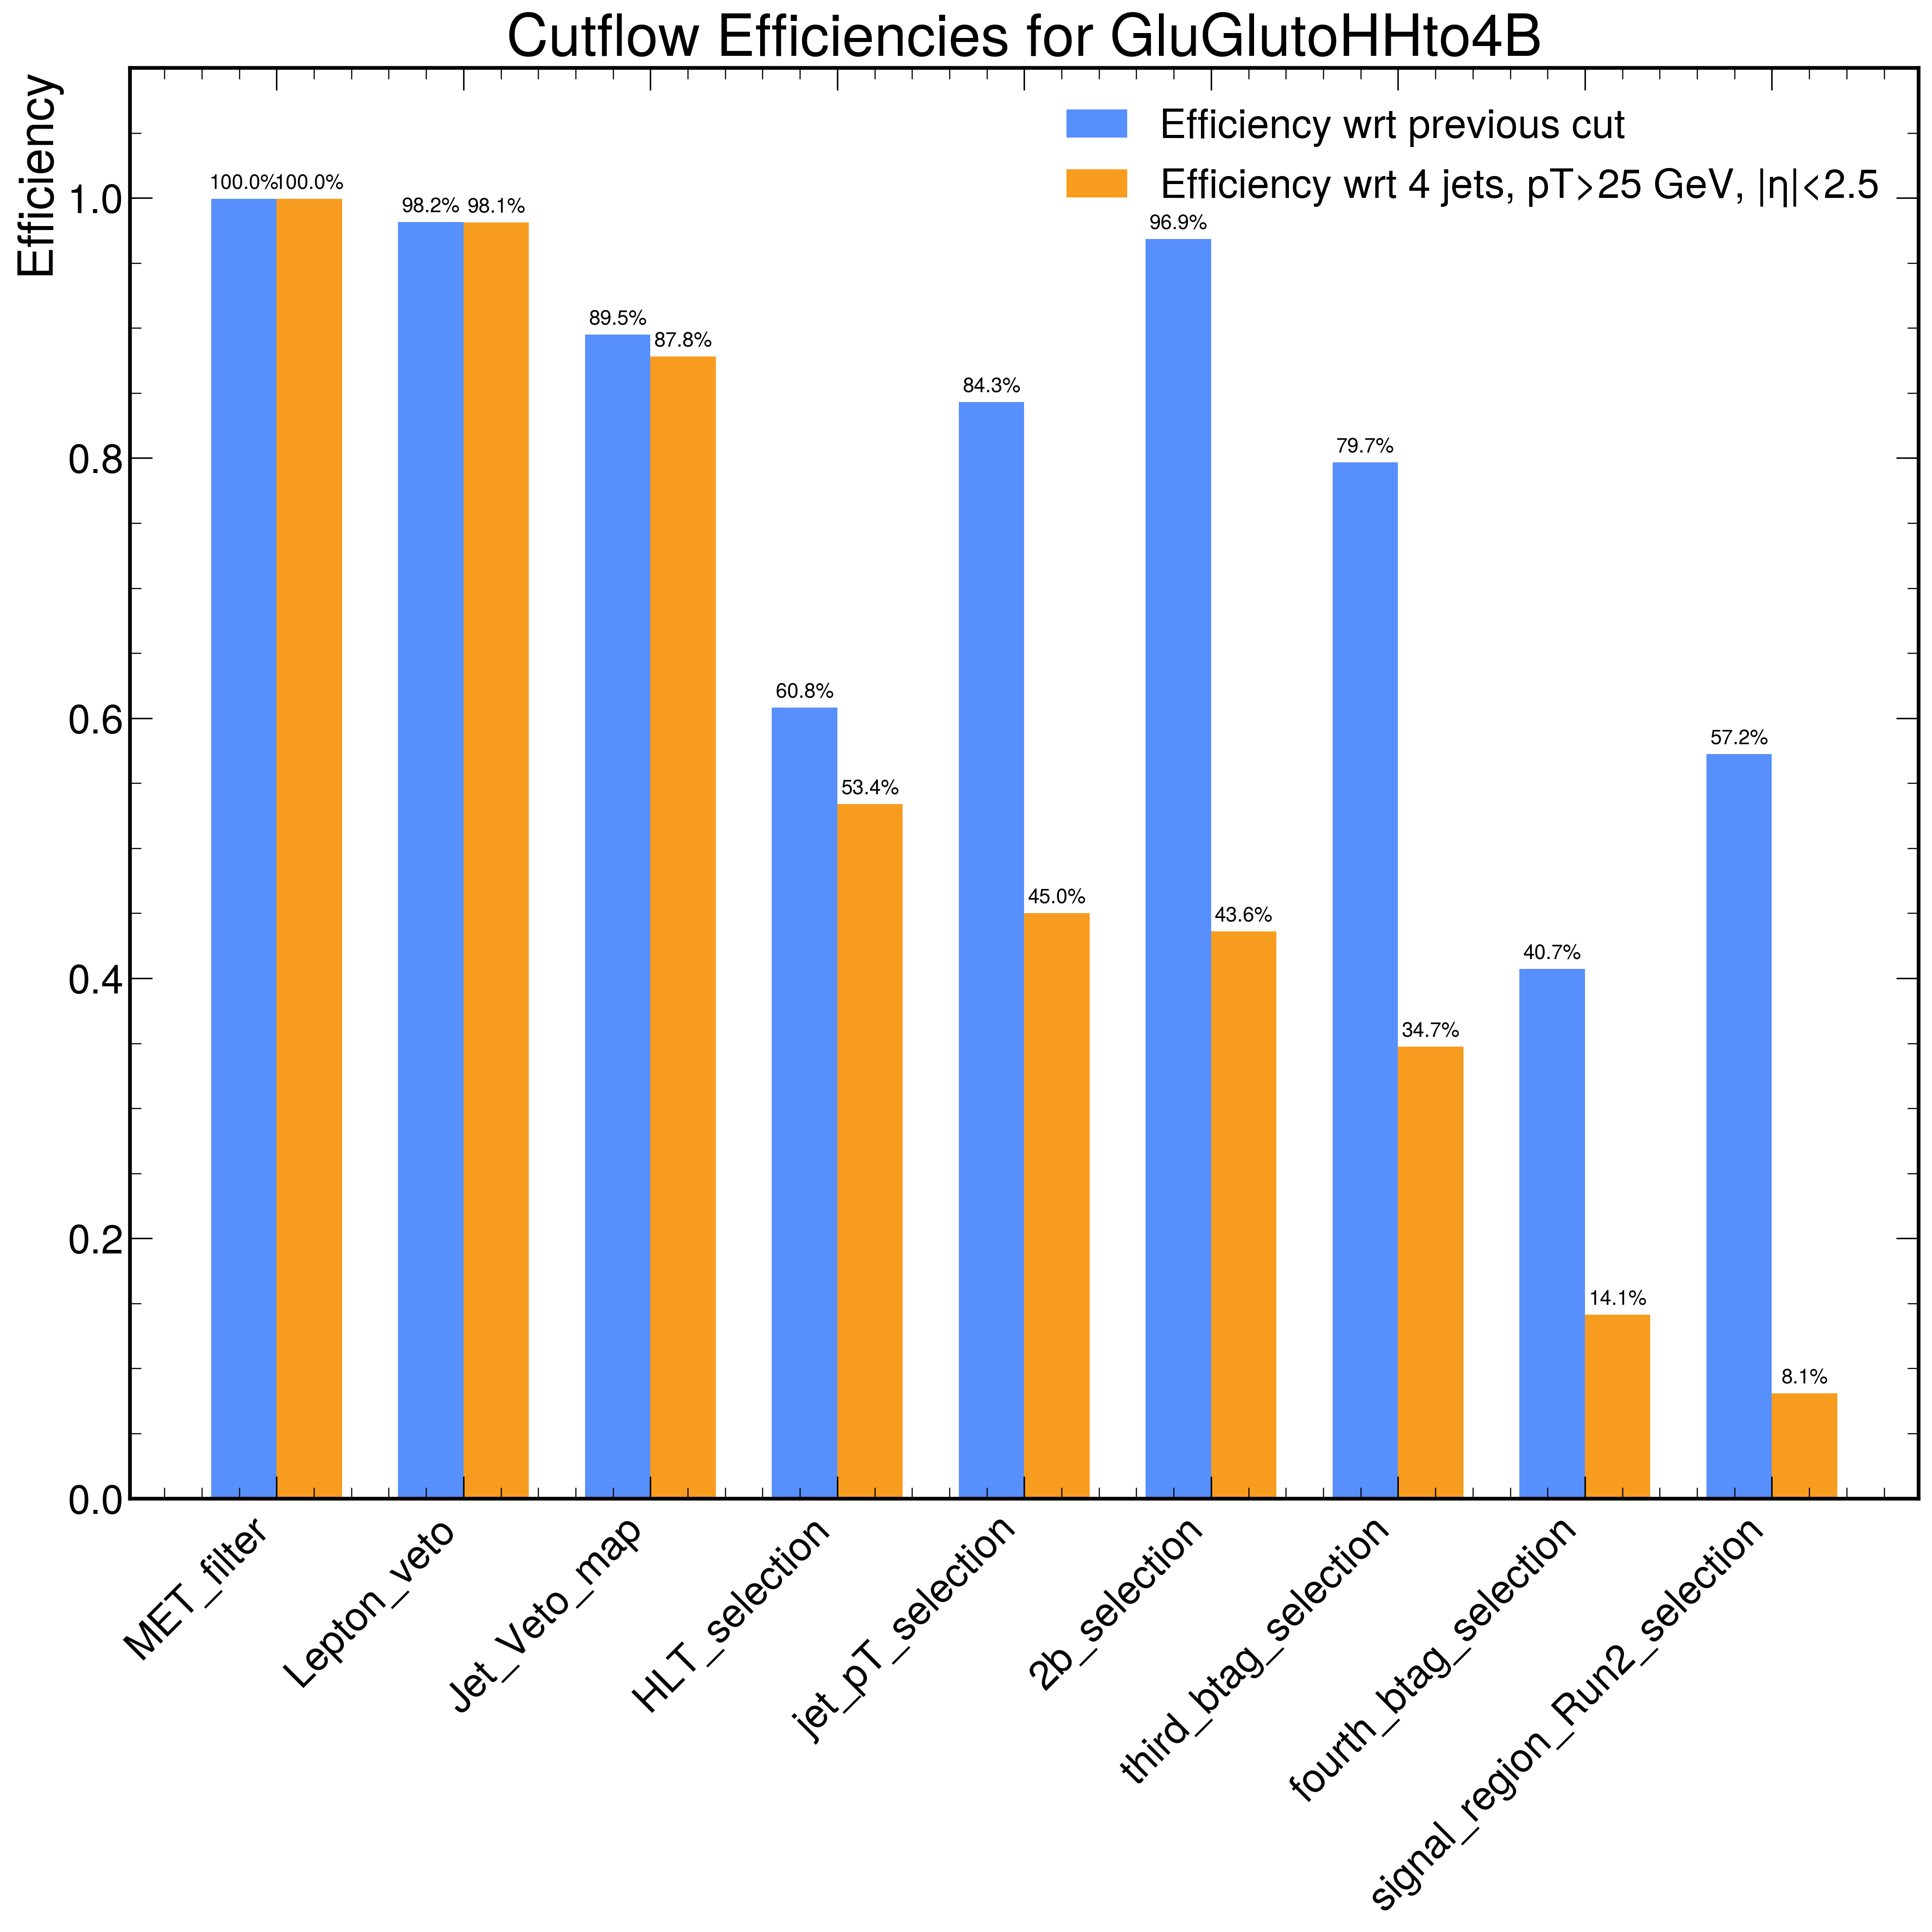

In [52]:
# compute the efficiencies of each cut respect to the previous one and also to the initial number of events
efficiencies=[]
list_cuts=list(num_events_dict.keys())
initial_events=num_events_dict[list_cuts[0]]
for name, num_events in num_events_dict.items():
    if name== list_cuts[0]:
        continue
    prev_cut_name=list_cuts[list_cuts.index(name)-1]
    prev_cut_events=num_events_dict[prev_cut_name]
    eff= num_events/prev_cut_events if prev_cut_events>0 else 0
    total_eff= num_events/initial_events if initial_events>0 else 0
    efficiencies.append( (eff, total_eff) )
    
# plot the efficiencies
cut_names=list_cuts[1:]  # exclude initial
x = np.arange(len(cut_names))
eff_vals = [e[0] for e in efficiencies]
total_eff_vals = [e[1] for e in efficiencies]
width = 0.35
fig, ax = plt.subplots(figsize=(15, 15))
bars1 = ax.bar(x - width/2, eff_vals, width, label='Efficiency wrt previous cut')
bars2 = ax.bar(x + width/2, total_eff_vals, width, label=r'Efficiency wrt 4 jets, pT>25 GeV, |$\eta$|<2.5')
# print also the values on top of the bars
autolabel(ax, bars1)
autolabel(ax, bars2)

ax.set_ylabel('Efficiency')
ax.set_title(f'Cutflow Efficiencies for {sample}')
ax.set_xticks(x)
ax.set_xticklabels(cut_names, rotation=45, ha='right')
ax.legend(fontsize='small')
ax.set_ylim(0, 1.1)
hep.style.use(hep.style.CMS)
plt.tight_layout()
# plt.savefig(f"cutflow_efficiencies_{sample}.png")
plt.show()